# Notes from meeting
- can separate data into students who got A, B, and C and compare other values
- if using colors, use same color scheme for graphs
- Since there are a lot of categorical variables, can make a a Sankey diagram or a treemap

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

C:\Users\rjiang\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
df = pd.read_csv('Factors_ affecting_ university_student_grades_dataset.csv')

# Basic information about the dataset
#print(df.info())

# Display the first few rows of the dataset
df.head()

Age Gender Parental_Education Family_Income Previous_Grades  Attendance  \
0  22.0      F            College       50000.0               A        81.0   
1  21.0      M                NaN       60000.0               A         NaN   
2  19.0      M            College       75000.0               C        93.0   
3  21.0      M            College       60000.0               A        86.0   
4  19.0    NaN                NaN       40000.0             NaN        89.0   

  Class_Participation  Study_Hours     Major School_Type  ... Peer_Group  \
0              Medium          8.0       Law     Private  ...    Neutral   
1              Medium         12.0       Law      Public  ...   Negative   
2              Medium         12.0       Law     Private  ...    Neutral   
3                 Low         15.0  Business      Public  ...    Neutral   
4                High         15.0  Medicine         NaN  ...   Positive   

  Bullying Study_Space Learning_Style Tutoring Mentoring Lack_of_Interest  \
0      NaN          No         Visual      Yes       NaN              Low   
1       No          No       Auditory      Yes       Yes           Medium   
2       No         Yes            NaN       No        No              Low   
3       No         NaN       Auditory      Yes       Yes              Low   
4       No          No       Auditory      Yes       NaN           Medium   

  Time_Wasted_on_Social_Media  Sports_Participation Grades  
0                         2.0                   NaN      B  
1                         5.0                  High    NaN  
2                         2.0                  High      A  
3                         3.0                Medium      C  
4                         3.0                  High      B  

[5 rows x 35 columns]

In [3]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

               Age   Attendance  Study_Hours   Class_Size  Sleep_Patterns  \
count  9099.000000  9060.000000  9073.000000  9114.000000     9048.000000   
mean     19.996703    84.908499    12.467761    60.238754        6.538904   
std       1.406885     8.985221     4.613845    23.337209        1.720632   
min      18.000000    70.000000     5.000000    20.000000        4.000000   
25%      19.000000    77.000000     9.000000    40.000000        5.000000   
50%      20.000000    85.000000    12.000000    61.000000        7.000000   
75%      21.000000    93.000000    16.000000    80.000000        8.000000   
max      22.000000   100.000000    20.000000   100.000000        9.000000   

       Screen_Time  Time_Wasted_on_Social_Media  
count  9120.000000                  9137.000000  
mean      6.031469                     3.489329  
std       2.597880                     1.704057  
min       2.000000                     1.000000  
25%       4.000000                     2.000000  
50%   

In [4]:
#import vl_convert as vlc
#print(vlc.__version__)

In [5]:
# Define the mapping
grade_to_gpa = {
    'A': 4.0,
    'B': 3.0,
    'C': 2.0,
    'D': 1.0,
    'F': 0.0
}

# Apply the mapping to the 'Grades' column
df['GPA'] = df['Grades'].map(grade_to_gpa)

# Check the result
print(df[['Grades', 'GPA']].head())

  Grades  GPA
0      B  3.0
1    NaN  NaN
2      A  4.0
3      C  2.0
4      B  3.0


In [6]:
# Data Cleaning: Fill missing values with the mean for numerical columns and mode for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Check for missing values
print(df.isnull().sum())

Age                            0
Gender                         0
Parental_Education             0
Family_Income                  0
Previous_Grades                0
Attendance                     0
Class_Participation            0
Study_Hours                    0
Major                          0
School_Type                    0
Financial_Status               0
Parental_Involvement           0
Educational_Resources          0
Motivation                     0
Self_Esteem                    0
Stress_Levels                  0
School_Environment             0
Professor_Quality              0
Class_Size                     0
Extracurricular_Activities     0
Sleep_Patterns                 0
Nutrition                      0
Physical_Activity              0
Screen_Time                    0
Educational_Tech_Use           0
Peer_Group                     0
Bullying                       0
Study_Space                    0
Learning_Style                 0
Tutoring                       0
Mentoring 

C:\Users\rjiang\AppData\Local\Temp\ipykernel_11212\977409101.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\rjiang\AppData\Local\Temp\ipykernel_11212\977409101.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

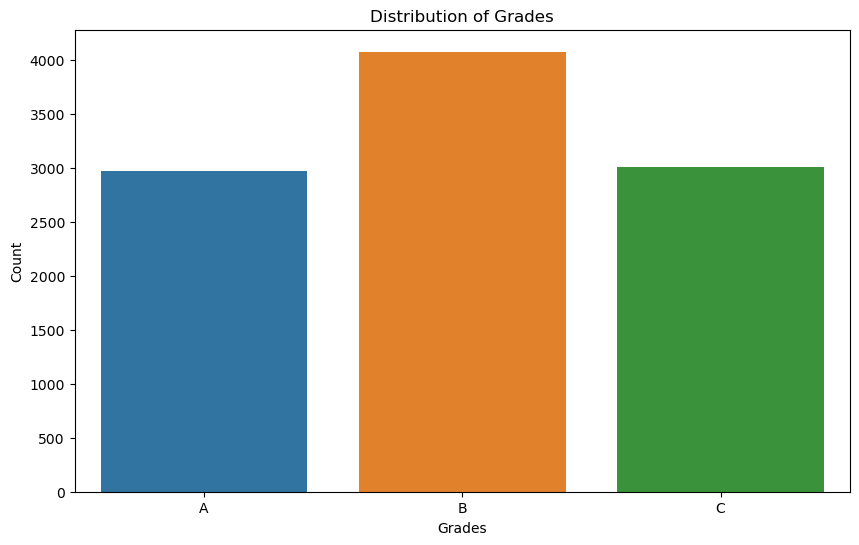

In [13]:
# Visualization 1: Distribution of Grades
grades_list = sorted(df['Grades'].unique())
plt.figure(figsize=(10, 6))
sns.countplot(x='Grades', data=df, order=grades_list)
plt.title('Distribution of Grades')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.savefig("Distribution_of_Grades.png")
plt.show()

<Figure size 1500x600 with 0 Axes>

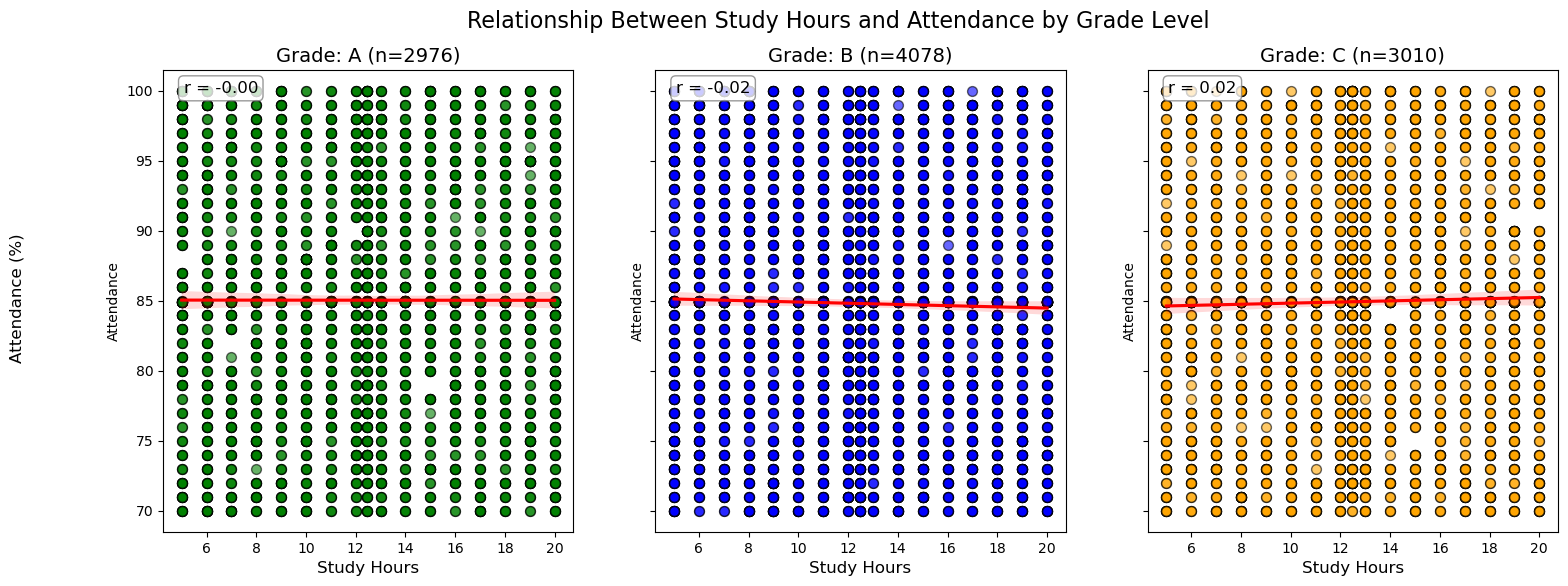

In [8]:
# Create a figure for the scatterplots
plt.figure(figsize=(15, 6))

# Create scatterplots for each grade
# Using subplots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True, sharex=True)

# Define colors for better visualization
colors = {'A': 'green', 'B': 'blue', 'C': 'orange'}
grade_labels = ['A', 'B', 'C']

# Create a scatterplot for each grade
for i, grade in enumerate(grade_labels):
    grade_data = df[df["Grades"] == grade]
    
    # Check if data exists for this grade
    if len(grade_data) > 0:
        axes[i].scatter(
            grade_data['Study_Hours'], 
            grade_data['Attendance'],
            alpha=0.6, 
            color=colors.get(grade, 'gray'),
            edgecolor='k',
            s=50
        )
        
        # Add a trend line
        sns.regplot(
            x='Study_Hours', 
            y='Attendance', 
            data=grade_data,
            scatter=False,
            ax=axes[i], 
            color='red'
        )
        
        # Set titles and labels
        axes[i].set_title(f'Grade: {grade} (n={len(grade_data)})', fontsize=14)
        axes[i].set_xlabel('Study Hours', fontsize=12)
        
        # Add correlation coefficient
        corr = grade_data['Study_Hours'].corr(grade_data['Attendance'])
        axes[i].annotate(f'r = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
                        fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Set common y-label
fig.text(0.04, 0.5, 'Attendance (%)', va='center', rotation='vertical', fontsize=12)

# Add a main title
plt.suptitle('Relationship Between Study Hours and Attendance by Grade Level', fontsize=16)

# Display the plot
plt.show()

# Save the figure
#plt.savefig('attendance_vs_study_hours_by_grade.png', dpi=300, bbox_inches='tight')

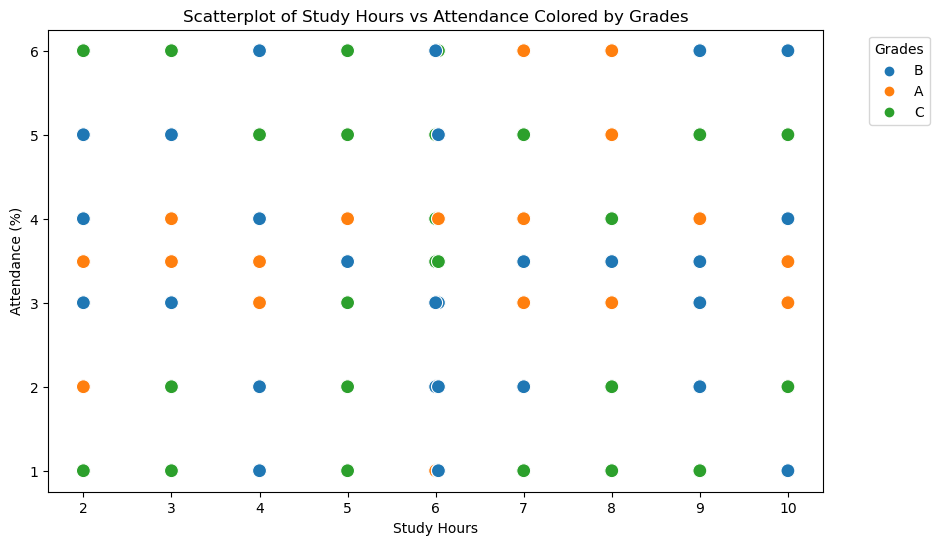

In [9]:
# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen_Time', y='Time_Wasted_on_Social_Media', hue='Grades', data=df, s=100)

# Add labels and title
plt.title('Scatterplot of Study Hours vs Attendance Colored by Grades')
plt.xlabel('Study Hours')
plt.ylabel('Attendance (%)')
plt.legend(title = 'Grades', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

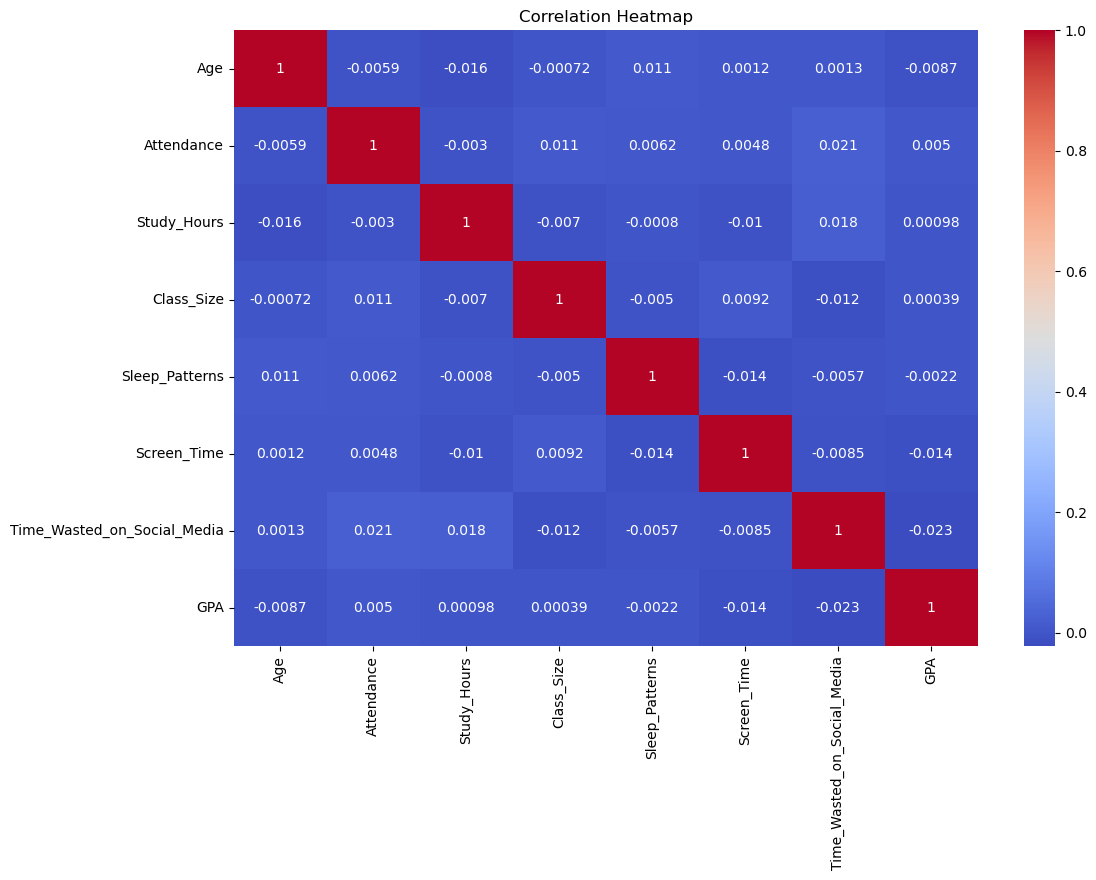

In [10]:
# Visualization 2: Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

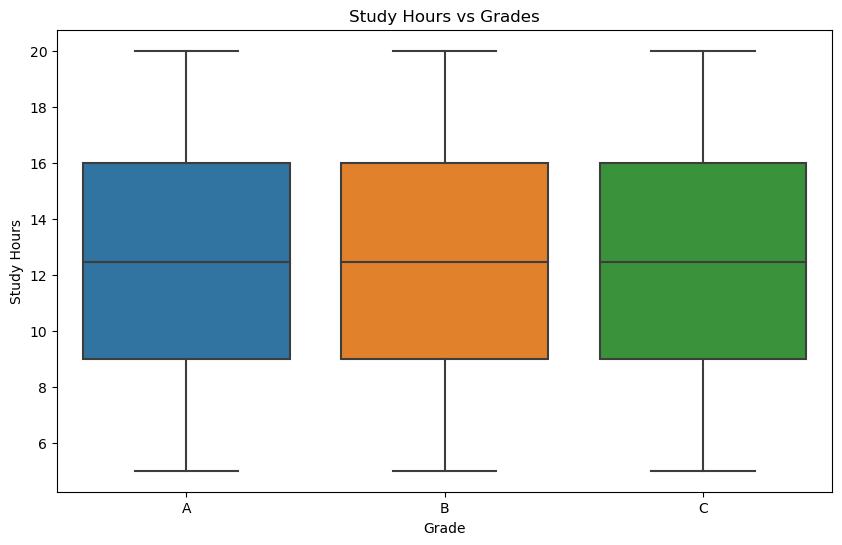

In [11]:
# Visualization 3: Study Hours vs GPA
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grades', y='Study_Hours', data=df, order=sorted(df['Grades'].unique()))
plt.title('Study Hours vs Grades')
plt.xlabel('Grade')
plt.ylabel('Study Hours')
plt.show()

In [12]:
# Sample 5,000 rows from the dataset
df_sampled = df.sample(n=5000, random_state=8)

# Create an interactive box plot
box_plot = alt.Chart(df_sampled).mark_boxplot().encode(
    x='Gender:N',  
    y='GPA:Q',    
    #color='Parental_Education:N', 
    tooltip=['Gender', 'Parental_Education', 'GPA']  
).properties(
    title='Distribution of Student Grades by Demographic Groups',
    width=600,
    height=400
)

# Add interactivity (zoom and pan)
interactive_plot = box_plot.interactive()

# Show the plot
interactive_plot.show()

alt.Chart(...)